## This project is from kaggle heart disease dataset which was aimed at detecting the possibility of heart disease from samples collected from different individuals.
## The class label 1 denotes the risk of heart disease while 0 denotes safe state.

### Loading of dependencies

In [972]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_recall_curve, classification_report

### loading of dataset

In [973]:
heart_disease = pd.read_csv("C:\\Users\\USER\\Desktop\\datasets\\heart.csv")

In [974]:
heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [975]:
heart_disease.shape

(918, 12)

In [976]:
heart_disease.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [977]:
heart_disease.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [978]:
#from the information above, 5 of the columns data are of string type.
#Evidently from the dataset, the output column is HeartDisease.

In [979]:
heart_disease.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [980]:
#the information above displays the different distribution of values in each column, from that, we can deduce that 
#"Sex", "ChestPainType", "FastingBS", "ExerciseAngina", "ST_Slope", "HeartDisease" are all categorical values.

## Data Visualisation and analysis

In [981]:
heart_disease.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

<AxesSubplot:>

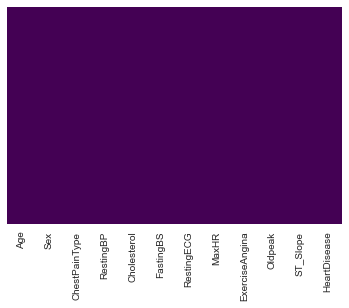

In [982]:
sns.heatmap(heart_disease.isna(), yticklabels=False, cbar=False, cmap="viridis")

##### this visually confirms the absence of a null value in the dataset

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

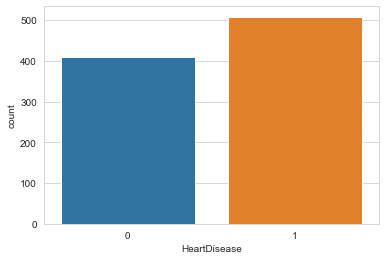

In [983]:
sns.set_style("whitegrid")
sns.countplot(x="HeartDisease", data=heart_disease)

In [984]:
heart_disease["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

##### from above we can deduce that the output variable is a fairly balanced one.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

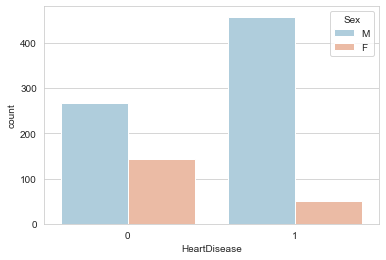

In [985]:
sns.set_style("whitegrid")
sns.countplot(x="HeartDisease", hue="Sex", data=heart_disease, palette="RdBu_r")

##### the above plot indicates that more male samples were collected for the documentation hence, higher statistical value in both the safe class and danger class

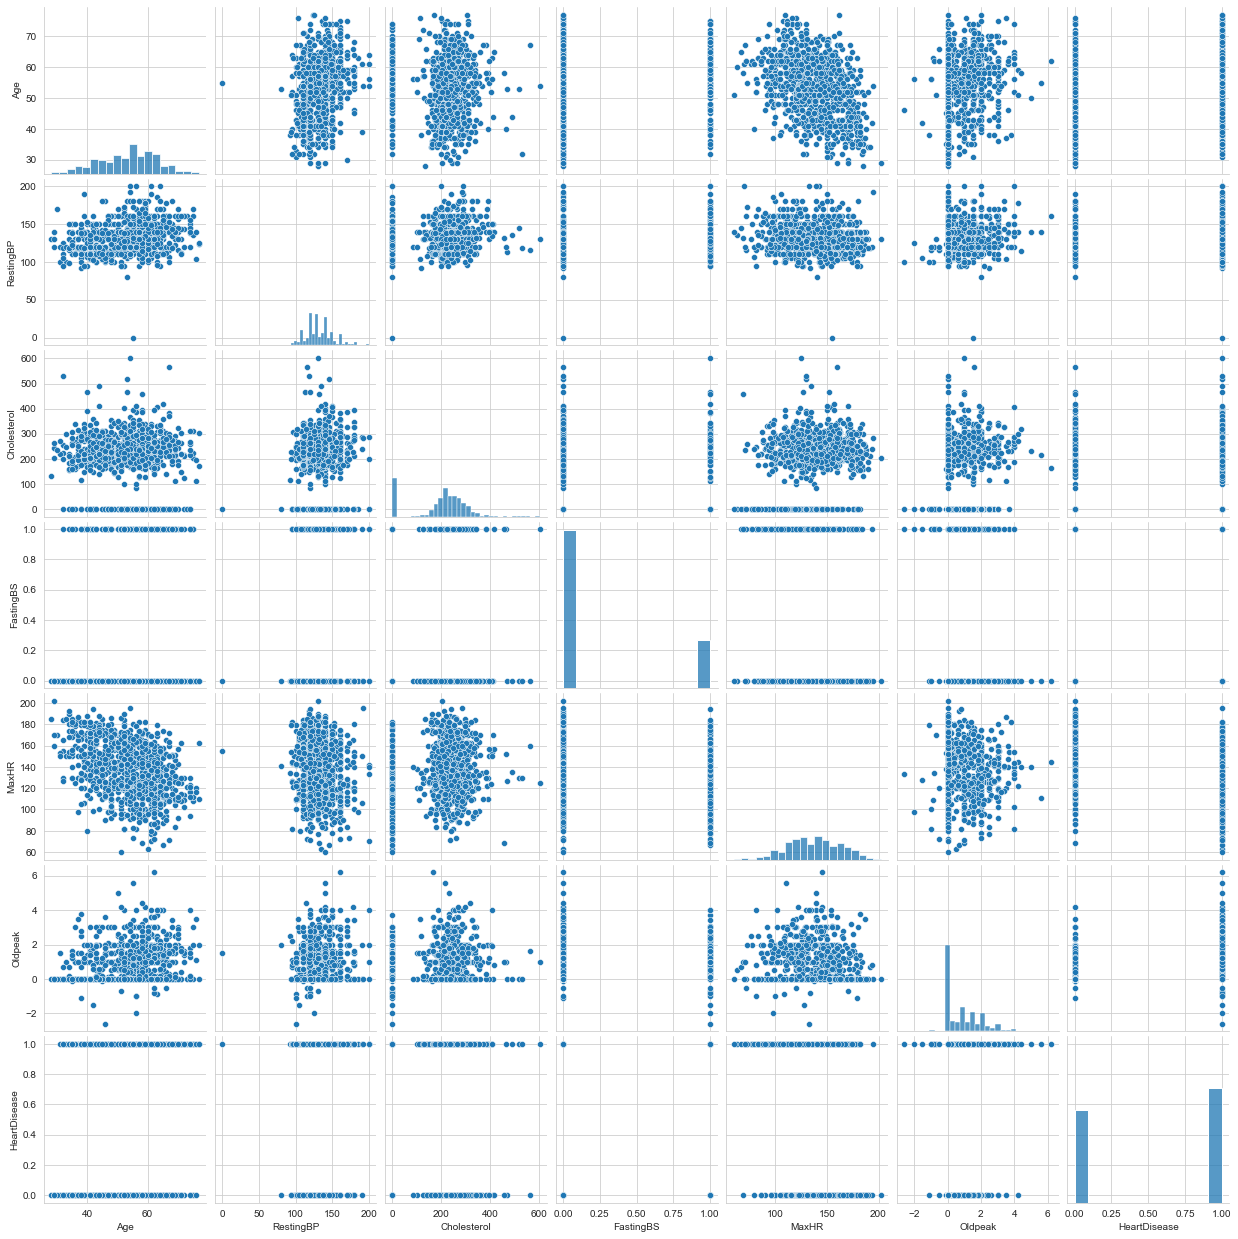

In [986]:
sns.pairplot(heart_disease)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

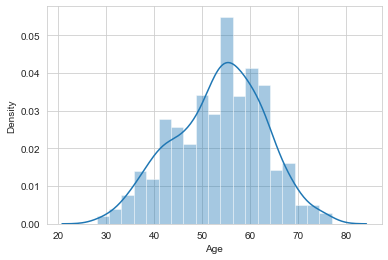

In [987]:
sns.distplot(heart_disease["Age"])

##### problem study is based majorly on people within the ages of 40-70.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

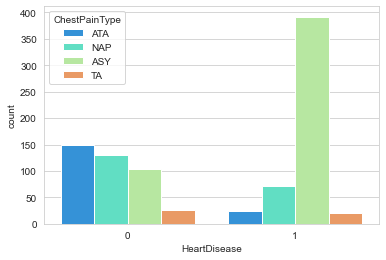

In [988]:
sns.countplot(x="HeartDisease", hue="ChestPainType", data=heart_disease, palette="rainbow")

##### from the plot, ppeople with Chest Pain Type  ASY stand the risk of heart disease more than others.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

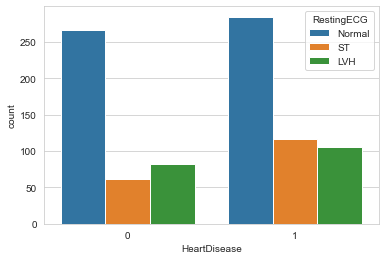

In [989]:
sns.countplot(x="HeartDisease", hue="RestingECG", data=heart_disease)

##### not much can be made of this plot as the data distribution is not of much variation

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

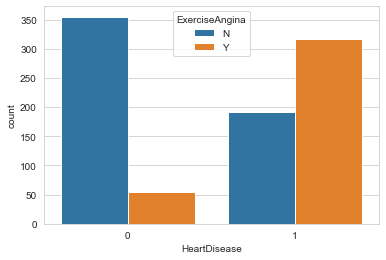

In [990]:
sns.countplot(x="HeartDisease", hue="ExerciseAngina", data=heart_disease)

##### People with Angina stand high risk of heart disease

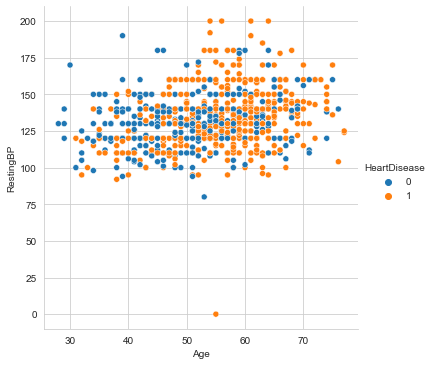

In [991]:
sns.relplot(x="Age", y="RestingBP", hue="HeartDisease", data=heart_disease)

##### people from age 55 and above with RestingBP of 125units and above are more susceptible to heart disease.

# Feature Engineering

###### 1. using One-Hot-Encoding to convert categorical columns into numericals columns
###### from the dataset, Sex,ChestPainType, RestinECG, ExerciseAngina, ST_Slope are all categorical columns



In [992]:
cat_cols = heart_disease[["Sex","ChestPainType","RestingECG", "ExerciseAngina", "ST_Slope"]]

In [993]:
cat_cols_encoded = pd.get_dummies(cat_cols)

heart_disease.join(cat_cols_encoded)

heart_disease.drop(["Sex","ChestPainType","RestingECG", "ExerciseAngina", "ST_Slope"], axis=1, inplace=True)

heart_disease.columns

heart_disease= heart_disease.join(cat_cols_encoded)

heart_disease

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


###### column splitting

In [994]:
x = heart_disease.drop("HeartDisease", axis=1)

y = heart_disease["HeartDisease"]

In [995]:
#correlation matrix for feature selection

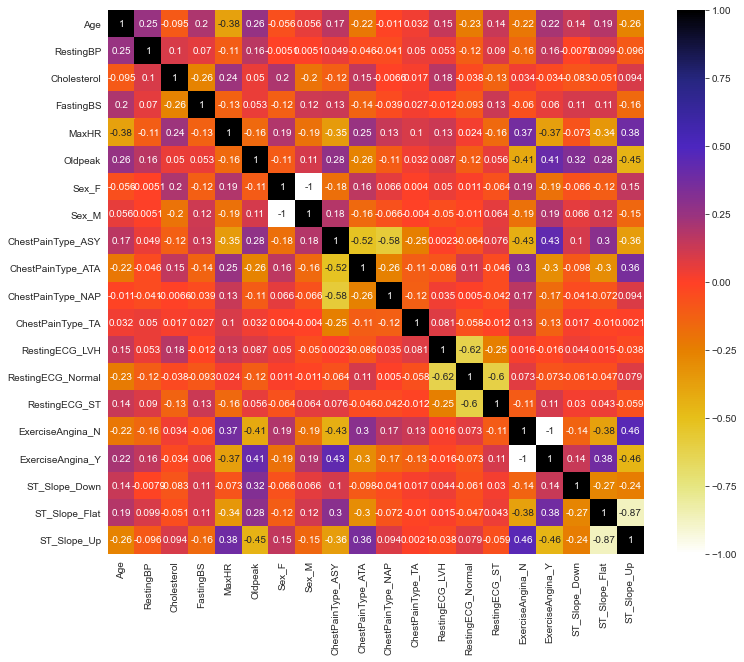

In [996]:
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [997]:
def correlation (dataset, threshold):
    col_corr = set()
    
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
        
    return col_corr
        

In [998]:
corr_features = correlation(x,0.8)
len(set(corr_features))

3

In [999]:
corr_features

{'ExerciseAngina_Y', 'ST_Slope_Up', 'Sex_M'}

[0.06310345 0.06843494 0.08166989 0.03732906 0.06885373 0.06844002
 0.02428322 0.0235699  0.08680557 0.03198474 0.01621829 0.0073601
 0.01703871 0.01394688 0.01085681 0.04918838 0.06282969 0.00989822
 0.10725766 0.15093076]


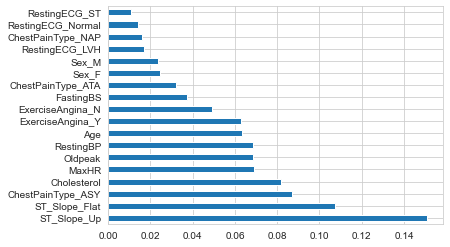

In [1000]:
#using feature importance

model = ExtraTreesClassifier()

model.fit(x, y)

print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)

feat_importances.nlargest(18).plot(kind="barh")
plt.show()

In [1001]:
# 10 important independent feature for x columns are:
feat_importances.nlargest(18)

ST_Slope_Up          0.150931
ST_Slope_Flat        0.107258
ChestPainType_ASY    0.086806
Cholesterol          0.081670
MaxHR                0.068854
Oldpeak              0.068440
RestingBP            0.068435
Age                  0.063103
ExerciseAngina_Y     0.062830
ExerciseAngina_N     0.049188
FastingBS            0.037329
ChestPainType_ATA    0.031985
Sex_F                0.024283
Sex_M                0.023570
RestingECG_LVH       0.017039
ChestPainType_NAP    0.016218
RestingECG_Normal    0.013947
RestingECG_ST        0.010857
dtype: float64

In [1002]:
x = x[["ST_Slope_Up", "ChestPainType_ASY", "ST_Slope_Flat", "Cholesterol", "MaxHR",
                  "Oldpeak", "Age", "RestingBP", "ExerciseAngina_N", "ExerciseAngina_Y", "FastingBS", 
       "Sex_M", "Sex_F", "RestingECG_Normal", "RestingECG_LVH", "ChestPainType_NAP", 
       "ChestPainType_ATA", "RestingECG_ST"]]

In [1003]:
x

,ST_Slope_Up,ChestPainType_ASY,ST_Slope_Flat,Cholesterol,MaxHR,Oldpeak,Age,RestingBP,ExerciseAngina_N,ExerciseAngina_Y,FastingBS,Sex_M,Sex_F,RestingECG_Normal,RestingECG_LVH,ChestPainType_NAP,ChestPainType_ATA,RestingECG_ST
0,1,0,0,289,172,0.0,40,140,1,0,0,1,0,1,0,0,1,0
1,0,0,1,180,156,1.0,49,160,1,0,0,0,1,1,0,1,0,0
2,1,0,0,283,98,0.0,37,130,1,0,0,1,0,0,0,0,1,1
3,0,1,1,214,108,1.5,48,138,0,1,0,0,1,1,0,0,0,0
4,1,0,0,195,122,0.0,54,150,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,0,1,264,132,1.2,45,110,1,0,0,1,0,1,0,0,0,0
914,0,1,1,193,141,3.4,68,144,1,0,1,1,0,1,0,0,0,0
915,0,1,1,131,115,1.2,57,130,0,1,0,1,0,1,0,0,0,0
916,0,0,1,236,174,0.0,57,130,1,0,0,0,1,0,1,0,1,0


In [1004]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [1005]:
from sklearn.preprocessing import StandardScaler

In [1006]:
scaler = StandardScaler()
scaler.fit_transform(x_train, x_test)
scaler.transform(x_test)

array([[-0.89630954,  0.88786307,  1.01886959, ..., -0.49659032,
        -0.4794633 , -0.47700468],
       [ 1.115686  , -1.1262998 , -0.98147988, ..., -0.49659032,
         2.08566536, -0.47700468],
       [-0.89630954,  0.88786307, -0.98147988, ..., -0.49659032,
        -0.4794633 ,  2.09641551],
       ...,
       [-0.89630954,  0.88786307,  1.01886959, ..., -0.49659032,
        -0.4794633 , -0.47700468],
       [-0.89630954,  0.88786307,  1.01886959, ..., -0.49659032,
        -0.4794633 ,  2.09641551],
       [-0.89630954,  0.88786307,  1.01886959, ..., -0.49659032,
        -0.4794633 , -0.47700468]])

In [1007]:
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)

In [1008]:
xgb_model.fit(x_train,y_train,early_stopping_rounds=5, eval_set = [(x_test,y_test)], verbose=False)

[23:42:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1009]:
prediction = xgb_model.predict(x_test)

In [1010]:
XGB_score = classification_report(prediction, y_test)


In [1011]:
RF_model = RandomForestClassifier(n_estimators=200, random_state=42)

In [1012]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [1013]:
preds = RF_model.predict(x_test)

In [1014]:
RF_score = classification_report(preds,y_test)

In [1015]:
from sklearn.svm import SVC

In [1016]:
SVC_model = SVC(kernel="linear")

In [1017]:
SVC_model.fit(x_train,y_train)

predsv = SVC_model.predict(x_test)

In [1018]:
SVC_score = classification_report(predsv, y_test)

In [1019]:
print("Classification report using XGBOOST: ")
print(XGB_score)

print("Classification report using Random Forest: ")
print(RF_score)

print("Classification report using Support Vector Machine: ") 
print(SVC_score)

Classification report using XGBOOST: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       111
           1       0.92      0.87      0.89       165

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

Classification report using Random Forest: 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       113
           1       0.92      0.89      0.91       163

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

Classification report using Support Vector Machine: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       113
           1       0.92      0.88      0.90       163

    accuracy                           0.88    